In [3]:
import spacy
from spacy.lang.en import English
import networkx as nx
import matplotlib.pyplot as plt

In [27]:
def getSentences(text):
    nlp = English()
    nlp.add_pipe(nlp.create_pipe('sentencizer'))
    document = nlp(text)
    return [sent.string.strip() for sent in document.sents]

def printToken(token):
    print(token.text, "->", token.dep_)

def appendChunk(original, chunk):
    return original + ' ' + chunk

def isRelationCandidate(token):
    deps = ["ROOT", "adj", "attr", "agent", "amod"]
    return any(subs in token.dep_ for subs in deps)

def isConstructionCandidate(token):
    deps = ["compound", "prep", "conj", "mod"]
    return any(subs in token.dep_ for subs in deps)

def processSubjectObjectPairs(tokens):
    subject = ''
    object = ''
    relation = ''
    subjectConstruction = ''
    objectConstruction = ''
    for token in tokens:
        printToken(token)
        if "punct" in token.dep_:
            continue
        if isRelationCandidate(token):
            relation = appendChunk(relation, token.lemma_)
        if isConstructionCandidate(token):
            if subjectConstruction:
                subjectConstruction = appendChunk(subjectConstruction, token.text)
            if objectConstruction:
                objectConstruction = appendChunk(objectConstruction, token.text)
        if "subj" in token.dep_:
            subject = appendChunk(subject, token.text)
            subject = appendChunk(subjectConstruction, subject)
            subjectConstruction = ''
        if "obj" in token.dep_:
            object = appendChunk(object, token.text)
            object = appendChunk(objectConstruction, object)
            objectConstruction = ''

    print (subject.strip(), ",", relation.strip(), ",", object.strip())
    return (subject.strip(), relation.strip(), object.strip())

def processSentence(sentence):
    tokens = nlp_model(sentence)
    return processSubjectObjectPairs(tokens)

def printGraph(triples):
    G = nx.Graph()
    for triple in triples:
        G.add_node(triple[0])
        G.add_node(triple[1])
        G.add_node(triple[2])
        G.add_edge(triple[0], triple[1])
        G.add_edge(triple[1], triple[2])

    pos = nx.spring_layout(G)
    plt.figure()
    nx.draw(G, pos, edge_color='black', width=1, linewidths=1, font_size=8,
            node_size=500, node_color='seagreen', alpha=0.9,
            labels={node: node for node in G.nodes()})
    plt.axis('off')
    plt.show()

In [5]:
text = "London is the capital and largest city of England and the United Kingdom. Standing on the River " \
           "Thames in the south-east of England, at the head of its 50-mile (80 km) estuary leading to " \
           "the North Sea, London has been a major settlement for two millennia. " \
           "Londinium was founded by the Romans. The City of London, " \
           "London's ancient core − an area of just 1.12 square miles (2.9 km2) and colloquially known as " \
           "the Square Mile − retains boundaries that follow closely its medieval limits." \
           "The City of Westminster is also an Inner London borough holding city status. " \
           "Greater London is governed by the Mayor of London and the London Assembly." \
           "London is located in the southeast of England." \
           "Westminster is located in London." \
           "London is the biggest city in Britain. London has a population of 7,172,036."

In [34]:
text = "My experiences is good with ABSLMF.It would be nice if we can get the intimation about the NFO.earlier IFA use to come but now he stopped come and I visit your office whenever there is any need but there also it is time taken. there should be someone how can assists us."


In [30]:
sentences = getSentences(text)

In [31]:
nlp_model = spacy.load('en_core_web_sm')

In [32]:
triples = []
print (text)
for sentence in sentences:
    triples.append(processSentence(sentence))

My experiences is good with ABSLMF.It would be nice if we can get the intimation about the NFO.earlier IFA use to come but now he stopped come and I visit your office whenever there is any need but there also it is time taken. there should be someone how can assists us.
My -> poss
experiences -> nsubj
is -> ROOT
good -> acomp
with -> prep
ABSLMF.It -> pobj
would -> aux
be -> ROOT
nice -> acomp
if -> mark
we -> nsubj
can -> aux
get -> advcl
the -> det
intimation -> nsubj
about -> prep
the -> det
NFO.earlier -> compound
IFA -> compound
use -> pobj
to -> aux
come -> ccomp
but -> cc
now -> advmod
he -> nsubj
stopped -> ROOT
come -> xcomp
and -> cc
I -> nsubj
visit -> ROOT
your -> poss
office -> dobj
whenever -> advmod
there -> expl
is -> advcl
any -> det
need -> attr
but -> cc
there -> expl
also -> advmod
it -> nsubj
is -> auxpass
time -> npadvmod
taken -> ROOT
. -> punct
experiences we intimation he I it , be be stop visit need take , ABSLMF.It use office
there -> expl
should -> aux
be ->

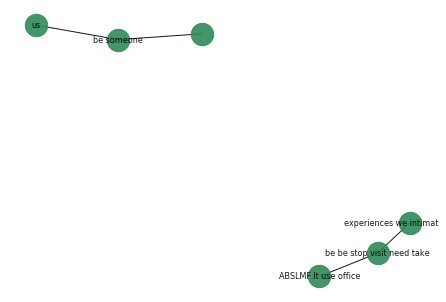

In [33]:
printGraph(triples)

node degree clustering
0 5 0.5
1 5 0.5
2 4 0.3333333333333333
3 3 0.6666666666666666
4 5 0.5
5 4 0.3333333333333333
6 4 0.16666666666666666
7 4 0.6666666666666666
8 4 0.6666666666666666
9 2 0

the adjacency list
0 1 3 4 8 6
1 8 4 7 5
2 7 4 6 5
3 8 6
4 7 8
5 7 9
6 9
7
8
9


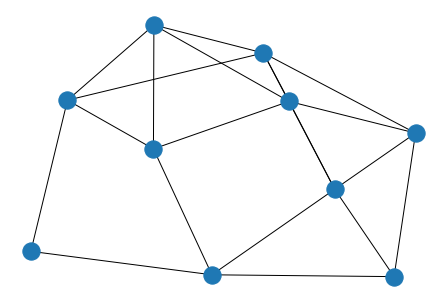

In [12]:
import matplotlib.pyplot as plt
from networkx import nx

n = 10  # 10 nodes
m = 20  # 20 edges

G = nx.gnm_random_graph(n, m)

# some properties
print("node degree clustering")
for v in nx.nodes(G):
    print(f"{v} {nx.degree(G, v)} {nx.clustering(G, v)}")

print()
print("the adjacency list")
for line in nx.generate_adjlist(G):
    print(line)

nx.draw(G)
plt.show()